In [19]:
import tensorflow as tf

In [20]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
%matplotlib inline

# load MNIST dataset of digits

In [21]:
(X_train , y_train), (X_test , y_test)= mnist.load_data()

# Plot 4 images under grayscale

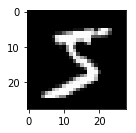

In [22]:
plt.subplot(221)
plt.imshow(X_train[0] , cmap=plt.get_cmap('gray'))

TypeError: Invalid dimensions for image data

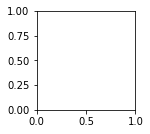

In [90]:
plt.subplot(222)
plt.imshow(X_train[3] , cmap=plt.get_cmap('gray'))

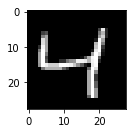

In [23]:
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

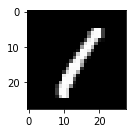

In [24]:
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# Baseline Model with MultiLayer Perceptron

In [50]:
import numpy

In [51]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# Fix random seed for reproductibility  

In [52]:
seed =7
numpy.random.seed(seed)

#  Load Data

In [58]:
(X_train , y_train), (x_test , y_test)= mnist.load_data()

# flatten 28*28 images into vector images

In [59]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalise inputs from 0-255 to 0-1

In [60]:
X_train = X_train/255
X_test = X_test/255

In [61]:
print(y_train)

[5 0 4 ..., 5 6 8]


In [62]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [68]:
print(y_train[2])

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


In [69]:
num_classes = y_test.shape[1]

In [71]:
print(y_train.shape)

(60000, 10)


# We are now ready to create our simple neural network model. We will define our model in a function

In [72]:
#define base model
def baseline_model() :
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function is used for the neurons in the hidden layer.

In [73]:
##The test db is used to evaluate 
model = baseline_model()
#print(X_train.size)

In [74]:
print(y_train.shape)

(60000, 10)


In [75]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7850      
Total params: 623,290.0
Trainable params: 623,290
Non-trainable params: 0.0
_________________________________________________________________
None


In [79]:
# Fit the model
#y_train = y_train.reshape((-1, 1))
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)


Epoch 1/10
14s - loss: 0.0284 - acc: 0.9908
Epoch 2/10
17s - loss: 0.0164 - acc: 0.9943
Epoch 3/10
18s - loss: 0.0084 - acc: 0.9976
Epoch 4/10
18s - loss: 0.0079 - acc: 0.9977
Epoch 5/10
17s - loss: 0.0080 - acc: 0.9975
Epoch 6/10
17s - loss: 0.0069 - acc: 0.9978
Epoch 7/10
18s - loss: 0.0065 - acc: 0.9980
Epoch 8/10
17s - loss: 0.0059 - acc: 0.9984
Epoch 9/10
17s - loss: 0.0038 - acc: 0.9989
Epoch 10/10
17s - loss: 0.0051 - acc: 0.9984


In [78]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (scores[1]*100))

Baseline Error: 8.92%


In [81]:
result = model.predict(X_train)

In [82]:
print(result[0])

[  4.28991272e-19   6.77853363e-16   1.44452002e-11   2.21041963e-04
   2.78607678e-32   9.99778926e-01   1.40536257e-20   4.66830835e-18
   2.26800322e-14   6.34425136e-16]


In [88]:
print(numpy.argmax(result[30]))

3
